In [20]:
import pandas as pd
import io
#Dependencies


from nltk.corpus import stopwords
import string
from nltk.stem.wordnet import WordNetLemmatizer

import warnings
warnings.simplefilter('ignore')
from itertools import chain


#123

df=pd.read_excel('Example for data base.xlsx')
df = df.rename(columns={"חותמת זמן":"Time stamp"})


<AxesSubplot:>

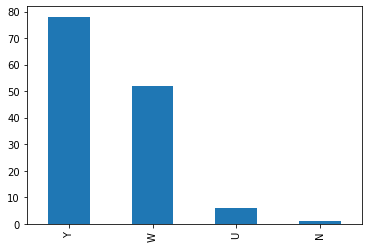

In [23]:

Instagram = df["Platform"]=="Instagram"
Twitter = df["Platform"]=="Twitter"
Facebook = df["Platform"]=="Facebook"
TikTok = df["Platform"]=="Tik Tok"
Youtube = df["Platform"]=="Youtube"

df_ig = df[Instagram]
df_ig['Category'].value_counts().plot(kind='bar')

<AxesSubplot:>

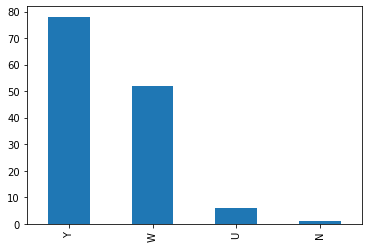

In [10]:
df_category=df_ig['Category'].value_counts()
df_category
df_category.plot(kind='bar', stacked=True,mark_right = True )
#איפה שכתובה הרשת נתון לשינוי


In [13]:
list = ["Anti-Zionist",
"Antisemitic",
"Non-Antisemitic"]

df = df.loc[df['Category'] .isin(list)]
df_platform=df.groupby(['Category', 'Platform'])Instagram.count().unstack('Category').fillna(0).astype(int)


df_platform.plot(kind='barh', stacked=True,mark_right = True )
#איפה שכתובה הרשת נתון לשינוי


KeyError: 'Columns not found: False, True'

In [25]:
#נתונים על הסרת תכנים לפי רשתות
df["Removed 1"]=df["Removed 1"].astype("str") 

def convert_to_category_remove_1(symbol):
    for letter in symbol:
        if letter == "X":
            return "Never"
        elif letter == "V":
            return "Second appeal"
        else:
            return "First appeal"

df["Post status"] = df["Removed 1"].apply(convert_to_category_remove_1)

status = df["Post status"]


#Cheking the percentage of posts removing in general view

status = df["Post status"]

#df.groupby("Category").agg({status:"mean"})

category = df["Category"]


general_removal_view = df.groupby[Instagram].status.value_counts() #get general info about the removal process of platforms

general_removal_view.plot(kind = "pie" , autopct='%1.0f%%', title = "How many posts removed in 1st / 2nd time, or never?", textprops={'color':"w"}) 





TypeError: 'method' object is not subscriptable

In [ ]:
#תכנים שלא הוסרו למרות שקוטלגו כאנטישמיים לפי רשת
df.groupby(['Category', 'Post status'])['Post status'].count().unstack('Post status').fillna(0).astype(int)
